### Clusterisasi Data Penerima Bansos Menggunakan K-Means Dengan PSO

In [ ]:
!pip install pyswarm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=a1411b1a509f04e51b04661be406c7dfb9076158a5da151bb7585852b7f33bc9
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
!pip install --upgrade pyswarms


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from pyswarm import pso
import pyswarms as ps
import matplotlib.pyplot as plt

In [ ]:
# Load data
df = pd.read_excel('dataset.xlsx','Sheet2')
df

,JDK,JUMLAH USIA DINI,JUMLAH BUMIL,JUMLAH ANAK SD,JUMLAH ANAK SMP,JUMLAH ANAK SMA,JUMLAH LANSIA,JUMLAH DISABILITAS
0,4,0,0,0,1,1,0,0
1,5,0,0,0,1,0,0,0
2,4,1,0,1,0,0,0,0
3,5,0,0,1,0,0,0,0
4,4,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
50478,3,0,0,1,0,0,0,0
50479,4,1,0,1,0,0,0,0
50480,1,0,0,0,0,0,1,0
50481,1,0,0,0,0,0,1,0


In [ ]:
# Melihat Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50483 entries, 0 to 50482
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   JDK                 50483 non-null  int64
 1   JUMLAH USIA DINI    50483 non-null  int64
 2   JUMLAH BUMIL        50483 non-null  int64
 3   JUMLAH ANAK SD      50483 non-null  int64
 4   JUMLAH ANAK SMP     50483 non-null  int64
 5   JUMLAH ANAK SMA     50483 non-null  int64
 6   JUMLAH LANSIA       50483 non-null  int64
 7   JUMLAH DISABILITAS  50483 non-null  int64
dtypes: int64(8)
memory usage: 3.1 MB


In [ ]:
# Standarisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
# Fungsi objektif untuk optimisasi PSO
def objective_function(x):
    k = int(x[0])
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_scaled, labels)
    return -silhouette_avg

# Batasan parameter
lb = [2]
ub = [10]

# Inisialisasi optimizer PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=1, options=options, bounds=(lb, ub))

# Jalankan optimisasi PSO
best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# Hitung nilai silhouette untuk klasterisasi k-means yang dioptimisasi
k = int(best_pos[0])
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_scaled)
labels = kmeans.labels_
silhouette_avg = silhouette_score(df_scaled, labels)

# Tampilkan jumlah klaster optimal dan nilai silhouette yang sesuai
print("Jumlah klaster optimal:", k)
print("Nilai silhouette:", silhouette_avg)


2023-05-17 12:25:27,789 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-.377
2023-05-17 13:19:17,897 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.37688169715621145, best pos: [4.06740633]


Jumlah klaster optimal: 4
Nilai silhouette: 0.37688169715621145


Pada algoritma Particle Swarm Optimization (PSO), terdapat beberapa parameter yang dapat dikonfigurasi untuk mengoptimalkan kinerja dan hasil optimisasi. Berikut adalah beberapa parameter yang umum digunakan dalam PSO beserta penjelasan singkat dan opsi nilai yang direkomendasikan:

**n_particles (int):** Jumlah partikel dalam populasi. Partikel merepresentasikan solusi dalam ruang pencarian. Opsi nilai yang direkomendasikan: umumnya antara 10 hingga 100.

**dimensions (int):** Jumlah dimensi dalam ruang pencarian. Menentukan jumlah variabel yang harus dioptimisasi. Opsi nilai yang direkomendasikan: sesuaikan dengan jumlah variabel yang ada pada masalah optimisasi.

**c1 (float):**Parameter kognitif (cognitive parameter) yang mengontrol kecepatan partikel berdasarkan pengaruh pribadinya. Opsi nilai yang direkomendasikan: umumnya antara 0.5 hingga 2.0.

**c2 (float):** Parameter sosial (social parameter) yang mengontrol kecepatan partikel berdasarkan pengaruh partikel terbaik dalam kelompoknya. Opsi nilai yang direkomendasikan: umumnya antara 0.5 hingga 2.0.

**w (float):** Bobot kecepatan inersia (inertia weight) yang mengontrol seberapa besar pengaruh kecepatan partikel sebelumnya dalam perhitungan kecepatan saat ini. Opsi nilai yang direkomendasikan: umumnya antara 0.4 hingga 0.9.

**bounds (tuple)**: Batasan (constraints) untuk nilai variabel dalam ruang pencarian. Misalnya, batasan bawah (lower bound) dan batasan atas (upper bound) untuk setiap variabel. Opsi nilai yang direkomendasikan: sesuaikan dengan batasan yang diterapkan pada masalah optimisasi.

**options (dict):** Opsi tambahan yang dapat dikonfigurasi, seperti jumlah iterasi maksimum (maxiter), tingkat toleransi konvergensi (ftol), dan sebagainya. Opsi nilai yang direkomendasikan: bergantung pada kompleksitas masalah dan sumber daya komputasi yang tersedia. Umumnya, jumlah iterasi maksimum dapat diatur antara 50 hingga 200.


**Referensi:**

Dokumentasi PySwarms: https://pyswarms.readthedocs.io/
Dokumentasi Particle Swarm Optimization in Python (pyswarm): https://pythonhosted.org/pyswarm/

Penting untuk dicatat bahwa nilai-nilai yang direkomendasikan dapat bervariasi tergantung pada karakteristik masalah optimisasi dan pengaturan khusus. Oleh karena itu, penting untuk melakukan eksperimen dan penyesuaian sesuai dengan kebutuhan dan tujuan optimisasi Anda.

In [ ]:
# Melihat hasil clusterisasi
df['cluster'] = pd.DataFrame(labels)
df

,JDK,JUMLAH USIA DINI,JUMLAH BUMIL,JUMLAH ANAK SD,JUMLAH ANAK SMP,JUMLAH ANAK SMA,JUMLAH LANSIA,JUMLAH DISABILITAS,cluster
0,4,0,0,0,1,1,0,0,1
1,5,0,0,0,1,0,0,0,3
2,4,1,0,1,0,0,0,0,3
3,5,0,0,1,0,0,0,0,3
4,4,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
50478,3,0,0,1,0,0,0,0,3
50479,4,1,0,1,0,0,0,0,3
50480,1,0,0,0,0,0,1,0,0
50481,1,0,0,0,0,0,1,0,0


In [ ]:
# calculate cluster count
cluster_count = df.groupby(['cluster']).size().reset_index(name='count')
cluster_count

,cluster,count
0,0,20832
1,1,9899
2,2,549
3,3,19203


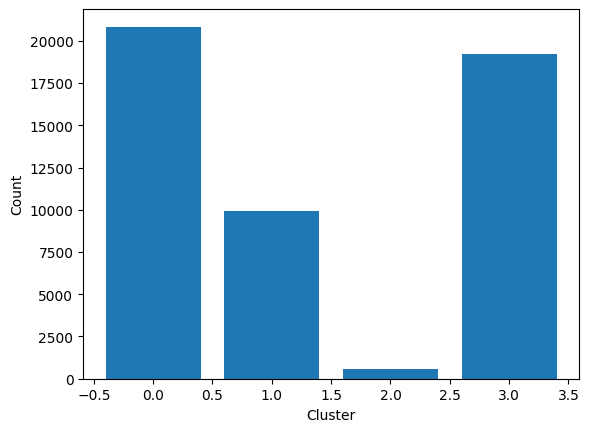

In [ ]:
# plot bar plot
plt.bar(x=cluster_count['cluster'], height=cluster_count['count'])
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [ ]:
# Ekspor Data
df.to_excel("Output_kmeansPSO.xlsx", index=False)